In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
crimes1 = pd.read_csv('/kaggle/input/crimes-in-chicago/Chicago_Crimes_2001_to_2004.csv',on_bad_lines='skip')
crimes2 = pd.read_csv('/kaggle/input/crimes-in-chicago/Chicago_Crimes_2005_to_2007.csv',on_bad_lines='skip')
crimes3 = pd.read_csv('/kaggle/input/crimes-in-chicago/Chicago_Crimes_2008_to_2011.csv',on_bad_lines='skip')
crimes4 = pd.read_csv('/kaggle/input/crimes-in-chicago/Chicago_Crimes_2012_to_2017.csv',on_bad_lines='skip')
crimes = pd.concat([crimes1, crimes2, crimes3, crimes4], ignore_index=False, axis=0)

/tmp/ipykernel_33/1346026615.py:1: DtypeWarning: Columns (17,20) have mixed types. Specify dtype option on import or set low_memory=False.
  crimes1 = pd.read_csv('/kaggle/input/crimes-in-chicago/Chicago_Crimes_2001_to_2004.csv',on_bad_lines='skip')


In [4]:
crimes.head(10)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,879,4786321,HM399414,01/01/2004 12:01:00 AM,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,7.0,46.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,2544,4676906,HM278933,03/01/2003 12:00:00 AM,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,11.0,61.0,26,1173974.0,1876757.0,2003.0,04/15/2016 08:55:02 AM,41.817229,-87.637328,"(41.817229156, -87.637328162)"
2,2919,4789749,HM402220,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,...,35.0,22.0,20,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
3,2927,4789765,HM402058,12/30/2004 08:00:00 PM,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,...,31.0,20.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
4,3302,4677901,HM275615,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,...,34.0,49.0,06,1174948.0,1831051.0,2003.0,04/15/2016 08:55:02 AM,41.691785,-87.635116,"(41.691784636, -87.635115968)"
5,3633,4838048,HM440266,08/01/2004 12:01:00 AM,012XX S HARDING AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,APARTMENT,False,...,24.0,29.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
6,3756,4791194,HM403711,01/01/2001 11:00:00 AM,114XX S ST LAWRENCE AVE,0266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,True,...,9.0,50.0,02,1182247.0,1829375.0,2001.0,08/29/2006 03:46:28 AM,41.68702,-87.608445,"(41.687020002, -87.60844523)"
7,4502,4679521,HM216293,03/15/2003 12:00:00 AM,090XX S RACINE AVE,5007,OTHER OFFENSE,OTHER WEAPONS VIOLATION,RESIDENCE PORCH/HALLWAY,False,...,21.0,73.0,26,1169911.0,1844832.0,2003.0,04/15/2016 08:55:02 AM,41.729712,-87.653159,"(41.729712374, -87.653158513)"
8,4564,4792195,HM405396,09/16/2004 10:00:00 AM,003XX W HUBBARD ST,0890,THEFT,FROM BUILDING,RESIDENCE,False,...,42.0,8.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
9,4904,4680124,HM282389,01/01/2003 12:00:00 AM,009XX S SPAULDING AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,24.0,29.0,06,1154521.0,1895755.0,2003.0,04/15/2016 08:55:02 AM,41.869772,-87.708180,"(41.869772159, -87.708180162)"


In [5]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7941282 entries, 0 to 1456713
Data columns (total 23 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   ID                    int64  
 2   Case Number           object 
 3   Date                  object 
 4   Block                 object 
 5   IUCR                  object 
 6   Primary Type          object 
 7   Description           object 
 8   Location Description  object 
 9   Arrest                bool   
 10  Domestic              bool   
 11  Beat                  int64  
 12  District              float64
 13  Ward                  float64
 14  Community Area        float64
 15  FBI Code              object 
 16  X Coordinate          float64
 17  Y Coordinate          object 
 18  Year                  float64
 19  Updated On            object 
 20  Latitude              object 
 21  Longitude             float64
 22  Location              object 
dtypes: bool(2), 

In [6]:
crimes.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [7]:
print('Dataset Shape before drop_duplicate : ', crimes.shape)
crimes.drop_duplicates(subset=['ID', 'Case Number'], inplace=True)
print('Dataset Shape after drop_duplicate: ', crimes.shape)

Dataset Shape before drop_duplicate :  (7941282, 23)
Dataset Shape after drop_duplicate:  (6170812, 23)


In [8]:
# We will not be using any of those columns in our analysis; so we filter them out

crimes.drop(['Unnamed: 0', 'Case Number', 'IUCR','Updated On','Year', 'FBI Code', 'Beat','Ward','Community Area', 'Location'], inplace=True, axis=1)

In [9]:
crimes.columns

Index(['ID', 'Date', 'Block', 'Primary Type', 'Description',
       'Location Description', 'Arrest', 'Domestic', 'District',
       'X Coordinate', 'Y Coordinate', 'Latitude', 'Longitude'],
      dtype='object')

In [10]:
crimes.head()

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,District,X Coordinate,Y Coordinate,Latitude,Longitude
0,4786321,01/01/2004 12:01:00 AM,082XX S COLES AVE,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,4.0,NaN,NaN,NaN,NaN
1,4676906,03/01/2003 12:00:00 AM,004XX W 42ND PL,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,9.0,1173974.0,1876757.0,41.817229,-87.637328
2,4789749,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False,14.0,NaN,NaN,NaN,NaN
3,4789765,12/30/2004 08:00:00 PM,045XX W MONTANA ST,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,False,25.0,NaN,NaN,NaN,NaN
4,4677901,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False,22.0,1174948.0,1831051.0,41.691785,-87.635116


In [11]:
# convert dates to pandas datetime format
crimes.Date = pd.to_datetime(crimes.Date, format='%m/%d/%Y %I:%M:%S %p')

In [12]:
# setting the index to be the date will help us a lot later on
crimes.index = pd.DatetimeIndex(crimes.Date)

In [13]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6170812 entries, 2004-01-01 00:01:00 to 2016-05-03 23:38:00
Data columns (total 13 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Date                  datetime64[ns]
 2   Block                 object        
 3   Primary Type          object        
 4   Description           object        
 5   Location Description  object        
 6   Arrest                bool          
 7   Domestic              bool          
 8   District              float64       
 9   X Coordinate          float64       
 10  Y Coordinate          object        
 11  Latitude              object        
 12  Longitude             float64       
dtypes: bool(2), datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 576.7+ MB


In [14]:
# As 'Location Description', 'Description' and 'Primary Type' columns are actually categorical 
# columns (or factors in R), we will only keep the most frequent categories and then cast them
# to a categorical type.

loc_to_change  = list(crimes['Location Description'].value_counts()[20:].index)
desc_to_change = list(crimes['Description'].value_counts()[20:].index)
type_to_change = list(crimes['Primary Type'].value_counts()[20:].index)

crimes.loc[crimes['Location Description'].isin(loc_to_change) , crimes.columns=='Location Description'] = 'OTHER'
crimes.loc[crimes['Description'].isin(desc_to_change) , crimes.columns=='Description'] = 'OTHER'
crimes.loc[crimes['Primary Type'].isin(type_to_change) , crimes.columns=='Primary Type'] = 'OTHER'

In [15]:
# we convert those 3 columns into 'Categorical' types -- works like 'factor' in R
crimes['Primary Type']         = pd.Categorical(crimes['Primary Type'])
crimes['Location Description'] = pd.Categorical(crimes['Location Description'])
crimes['Description']          = pd.Categorical(crimes['Description'])

# **Exploratory Data Analysis**

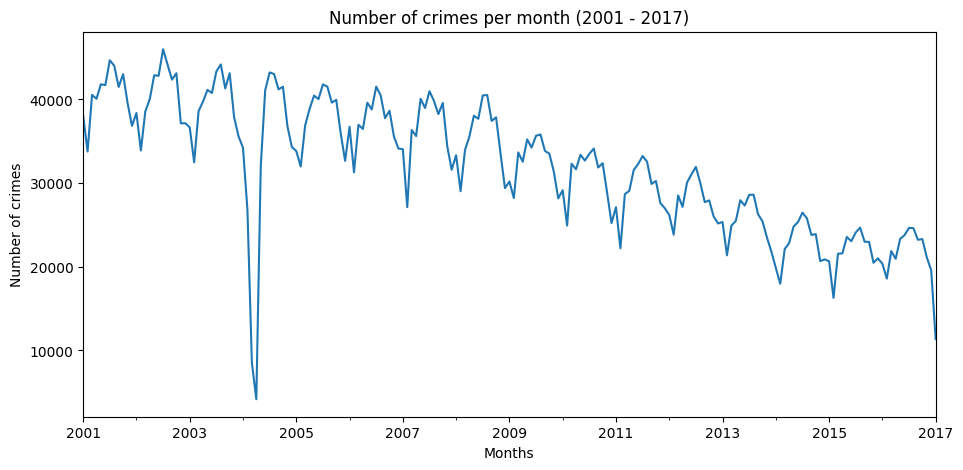

In [19]:
plt.figure(figsize=(11,5))
crimes.resample('ME').size().plot(legend=False)
plt.title('Number of crimes per month (2001 - 2017)')
plt.xlabel('Months')
plt.ylabel('Number of crimes')
plt.show()


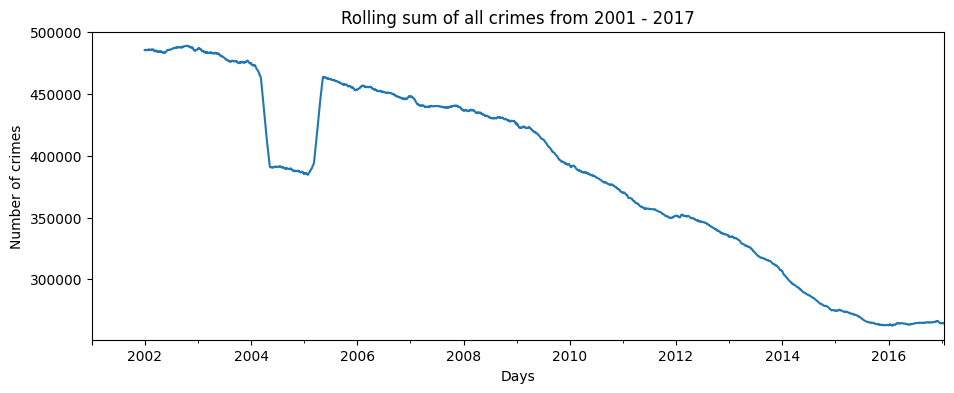

In [20]:
plt.figure(figsize=(11,4))
crimes.resample('D').size().rolling(365).sum().plot()
plt.title('Rolling sum of all crimes from 2001 - 2017')
plt.ylabel('Number of crimes')
plt.xlabel('Days')
plt.show()

/tmp/ipykernel_33/3377934976.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  crimes_count_date = crimes.pivot_table('ID', aggfunc=np.size, columns='Primary Type', index=crimes.index.date, fill_value=0)


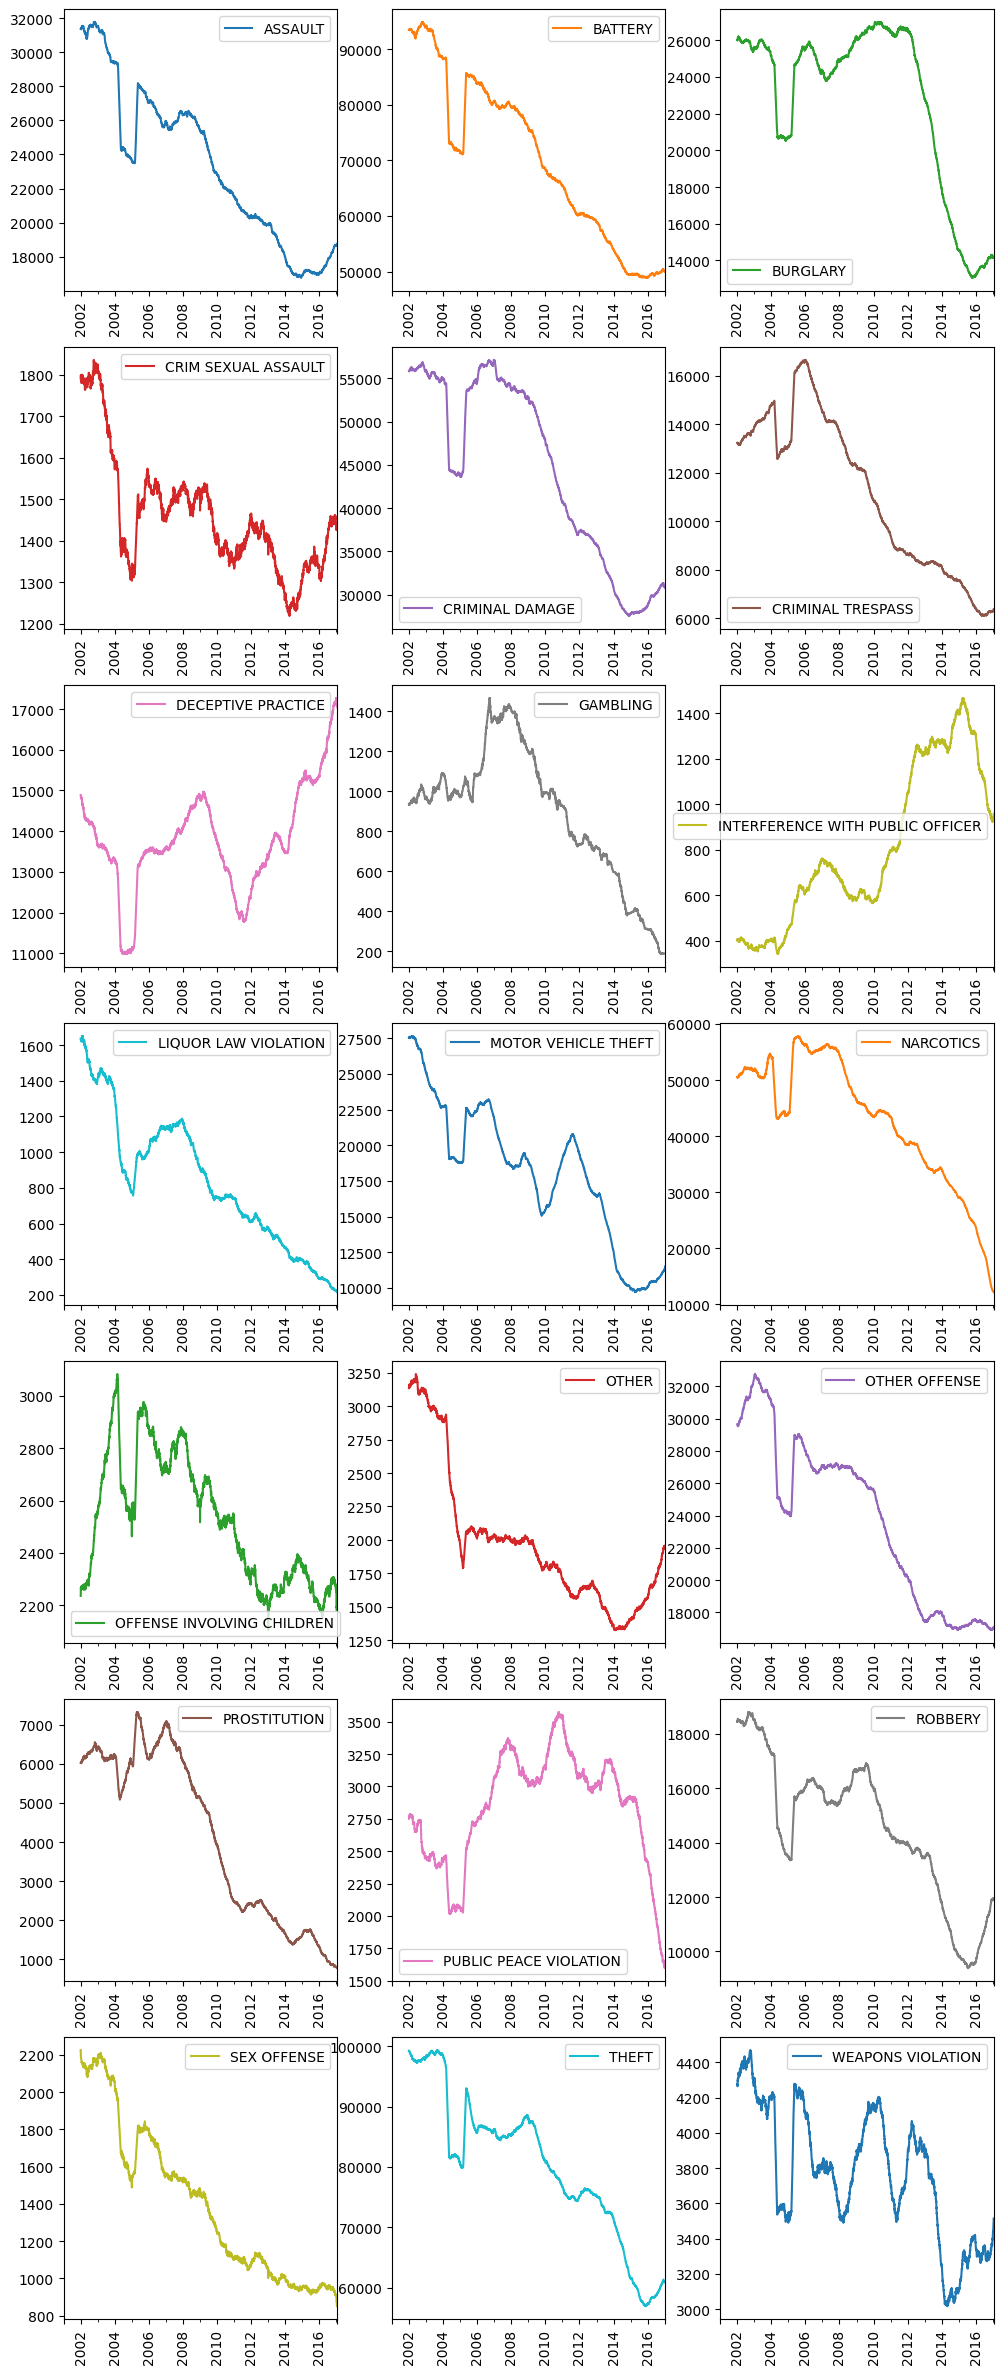

In [24]:
# separate crimes by type

crimes_count_date = crimes.pivot_table('ID', aggfunc=np.size, columns='Primary Type', index=crimes.index.date, fill_value=0)
crimes_count_date.index = pd.DatetimeIndex(crimes_count_date.index)

# Plot with rolling sum and rotate x-ticks
plo = crimes_count_date.rolling(365).sum().plot(figsize=(12, 30), subplots=True, layout=(-1, 3), sharex=False, sharey=False)

# Rotate x-ticks
for ax in plo.flatten():
    plt.setp(ax.get_xticklabels(), rotation=90)

plt.show()

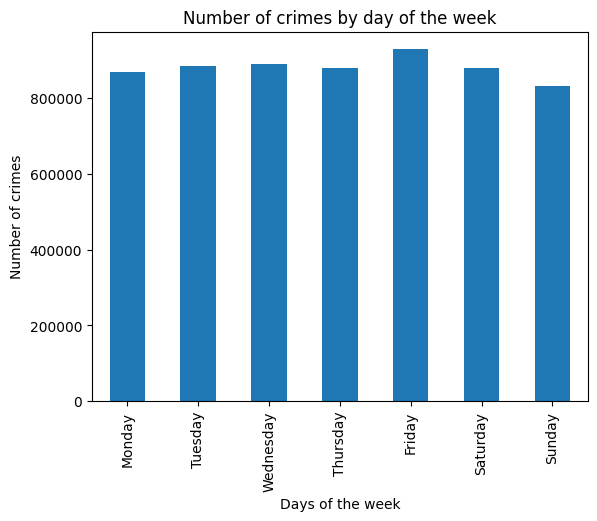

In [39]:
days = ['Monday','Tuesday','Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']
crimes.groupby([crimes.index.dayofweek]).size().plot(kind='bar')
plt.xlabel('Days of the week')
plt.xticks(np.arange(7), days)
plt.ylabel('Number of crimes')
plt.title('Number of crimes by day of the week')
plt.show()

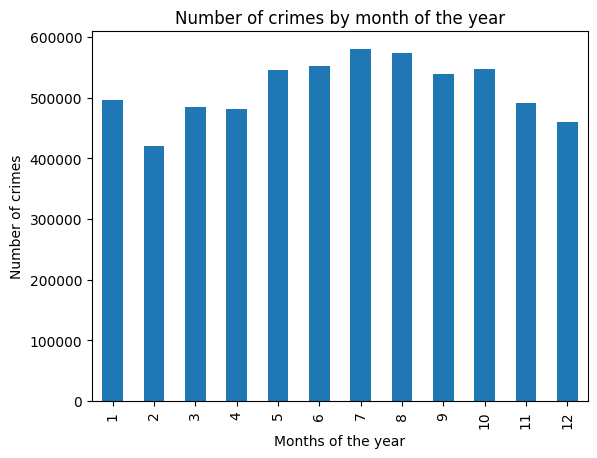

In [41]:
crimes.groupby([crimes.index.month]).size().plot(kind='bar')
plt.xlabel('Months of the year')
plt.ylabel('Number of crimes')
plt.title('Number of crimes by month of the year')
plt.show()

/tmp/ipykernel_33/3311904286.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  crimes.groupby([crimes['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')


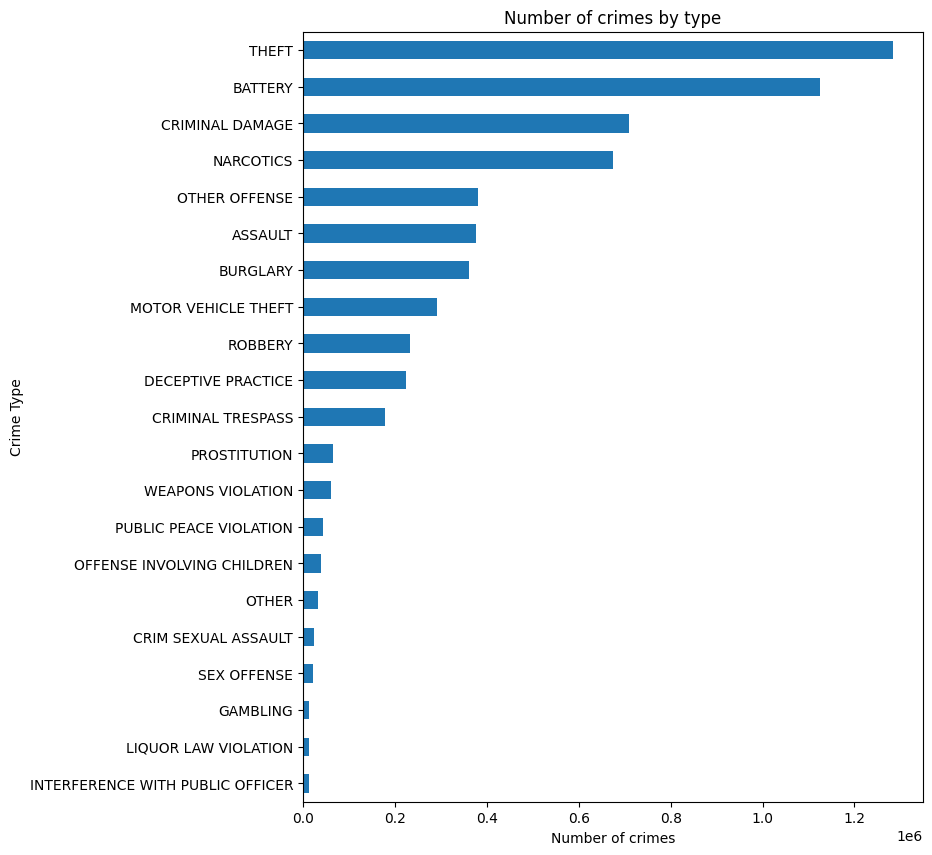

In [29]:
plt.figure(figsize=(8,10))
crimes.groupby([crimes['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by type')
plt.ylabel('Crime Type')
plt.xlabel('Number of crimes')
plt.show()

/tmp/ipykernel_33/2786015682.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  crimes.groupby([crimes['Location Description']]).size().sort_values(ascending=True).plot(kind='barh')


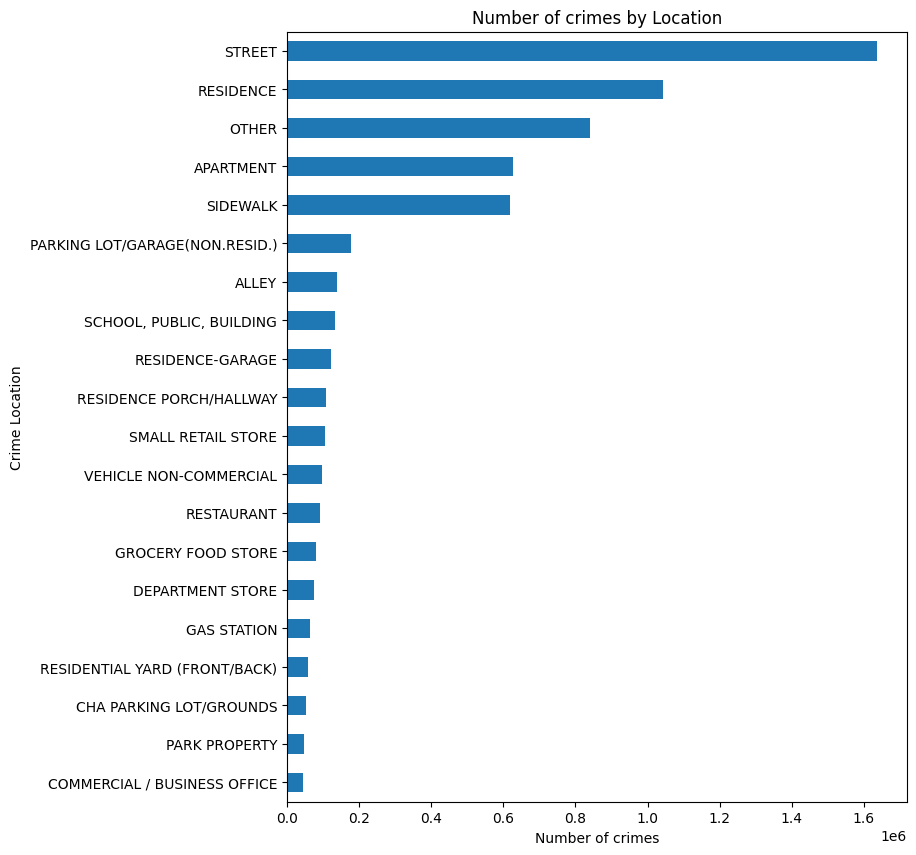

In [30]:
plt.figure(figsize=(8,10))
crimes.groupby([crimes['Location Description']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by Location')
plt.ylabel('Crime Location')
plt.xlabel('Number of crimes')
plt.show()

In [42]:
res=crimes['Arrest'].value_counts()
res

Arrest
False    4426667
True     1744145
Name: count, dtype: int64

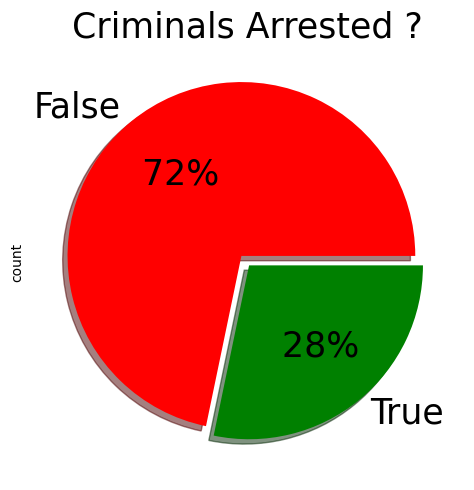

In [43]:
res.plot(kind='pie',figsize=(5,5),autopct="%3.0f%%",colors=['red','green'],shadow=True,fontsize=25,explode=[0.05,.02])

plt.title('Criminals Arrested ?',fontsize=25)

plt.tight_layout()